In [1]:
import pandas as pd

train = pd.read_csv("../data/train.csv")
print(train.shape)
train.head()

(3116945, 22)


,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [3]:
import pandas as pd

# Load training data
train = pd.read_csv("../data/train.csv")

# Shape of the dataset
print("Shape:", train.shape)

# Column names
print("\nColumns:\n", train.columns.tolist())

# Data types of the first few columns
print("\nDtypes:\n", train.dtypes.head())

# Peek at first 5 rows
train.head()


Shape: (3116945, 22)

Columns:
 ['id', 'class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']

Dtypes:
 id                int64
class            object
cap-diameter    float64
cap-shape        object
cap-surface      object
dtype: object


,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [5]:
# Missing values count per column
missing = train.isna().sum().sort_values(ascending=False)

print("Columns with missing values:")
print(missing[missing > 0])

# Also, percentage of missing values
missing_percent = (train.isna().sum() / len(train)) * 100
print("\nPercentage missing per column (non-zero only):")
print(missing_percent[missing_percent > 0].sort_values(ascending=False))

Columns with missing values:
veil-type               2957493
spore-print-color       2849682
stem-root               2757023
veil-color              2740947
stem-surface            1980861
gill-spacing            1258435
cap-surface              671023
gill-attachment          523936
ring-type                128880
gill-color                   57
habitat                      45
cap-shape                    40
stem-color                   38
has-ring                     24
cap-color                    12
does-bruise-or-bleed          8
cap-diameter                  4
dtype: int64

Percentage missing per column (non-zero only):
veil-type               94.884350
spore-print-color       91.425482
stem-root               88.452732
veil-color              87.936970
stem-surface            63.551362
gill-spacing            40.373988
cap-surface             21.528227
gill-attachment         16.809280
ring-type                4.134818
gill-color               0.001829
habitat                  0

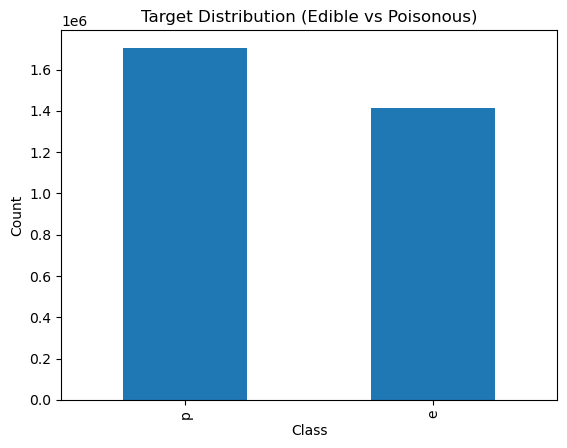

In [7]:
import matplotlib.pyplot as plt

# Target distribution
train['class'].value_counts().plot(kind="bar")
plt.title("Target Distribution (Edible vs Poisonous)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

Numeric columns: ['id', 'cap-diameter', 'stem-height', 'stem-width']


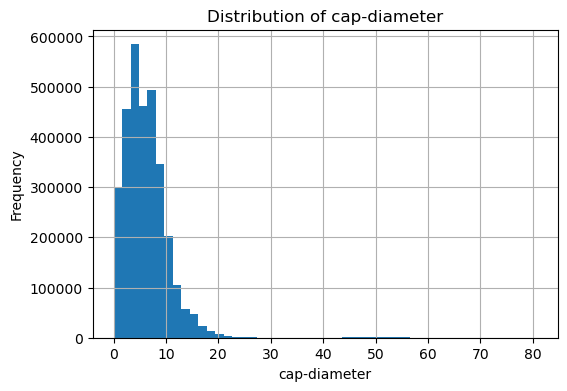

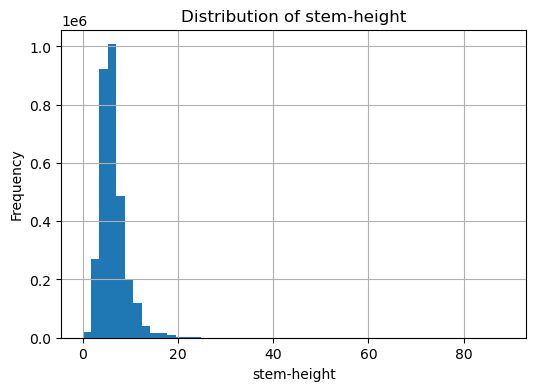

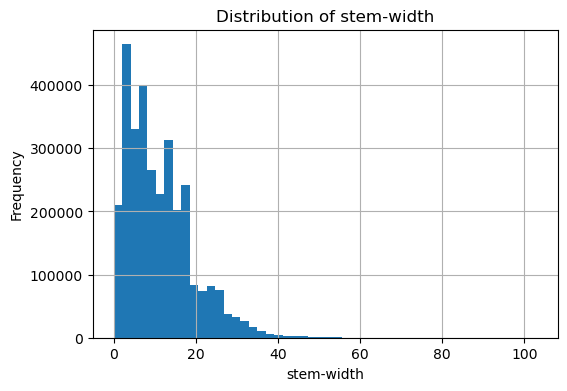

In [9]:
# Identify numeric columns
numeric_cols = train.select_dtypes(include=["float64", "int64"]).columns.tolist()
print("Numeric columns:", numeric_cols)

# Drop id (not useful for distribution plots)
numeric_cols = [col for col in numeric_cols if col != "id"]

# Plot histograms for each numeric column
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    train[col].hist(bins=50)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [11]:
# Identify categorical columns
cat_cols = train.select_dtypes(include=["object"]).columns.tolist()
cat_cols = [col for col in cat_cols if col not in ["class"]]  # exclude target
print("Categorical columns:", cat_cols)

# Show top 5 value counts for a few categorical columns
for col in cat_cols[:5]:   # first 5 just as a sample
    print(f"\n--- {col} ---")
    print(train[col].value_counts(dropna=False).head())


Categorical columns: ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']

--- cap-shape ---
cap-shape
x    1436026
f     676238
s     365146
b     318646
o     108835
Name: count, dtype: int64

--- cap-surface ---
cap-surface
NaN    671023
t      460777
s      384970
y      327826
h      284460
Name: count, dtype: int64

--- cap-color ---
cap-color
n    1359542
y     386627
w     379442
g     210825
e     197290
Name: count, dtype: int64

--- does-bruise-or-bleed ---
does-bruise-or-bleed
f    2569743
t     547085
w         14
c         11
h          9
Name: count, dtype: int64

--- gill-attachment ---
gill-attachment
a      646034
d      589236
NaN    523936
x      360878
e      301858
Name: count, dtype: int64


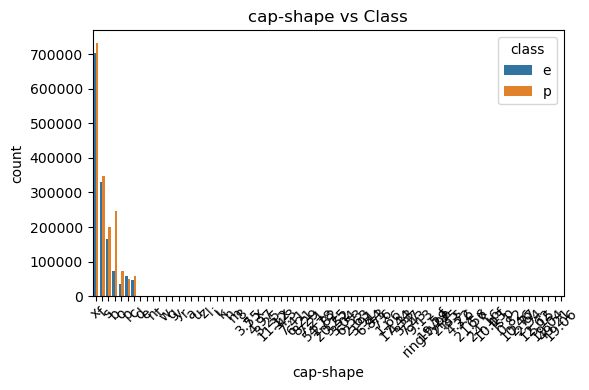

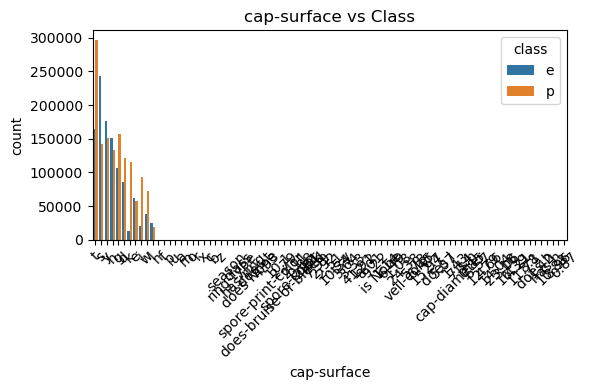

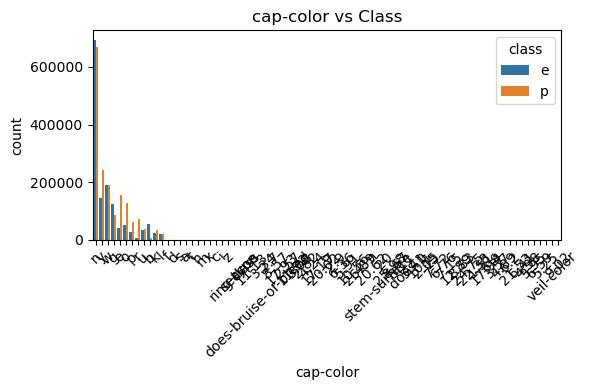

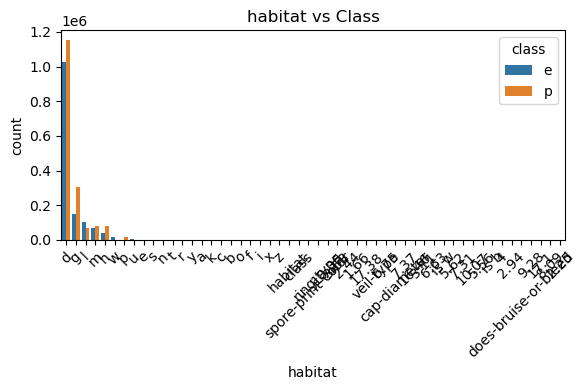

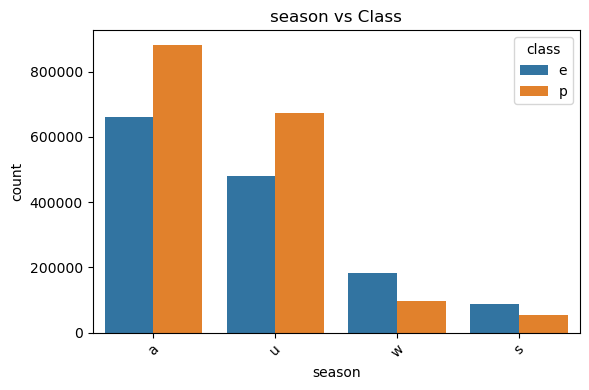

In [21]:
import seaborn as sns

# Plot distribution of each category split by class (edible vs poisonous)
plot_cols = ["cap-shape", "cap-surface", "cap-color", "habitat", "season"]

for col in plot_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=train, x=col, hue="class", order=train[col].value_counts().index)
    plt.title(f"{col} vs Class")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
